In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [2]:
def ds_fix_dims(ds):
    ds = ds.rename({ds[ds.w.dims[0]].name:'time_coarse', ds[ds.w_max.dims[0]].name:'time_fine', ds[ds.rho.dims[0]].name: 'time_mid'})
    ds['time_coarse']=ds.time_coarse/3600
    ds['time_mid']=ds.time_mid/3600
    ds['time_fine']=ds.time_fine/3600
    ds['x'] = ds.x.astype(float)/(35)
    ds['y'] = ds.y.astype(float)/(35)
    return ds


In [3]:
def clfrac(ds, cut=None):
    include_spinup=True
    if include_spinup == True:
        lmmr = ds.q_cloud_liquid_mass[:,:,:,:]
    else:
        lmmr = ds.q_cloud_liquid_mass[coarse_spin:]
        hours -= 1
        
    if cut is not None:
        lmmr = lmmr[:cut]
    #print(lmmr[0,125,125])
    cloud_frac, times, masks = column_cloud_fraction(lmmr)
    #cloud_frac_last = cloud_frac[last]
    #cloud_frac_mean = np.mean(cloud_frac[-coarse_ave:])
    #cloud_frac_teme = (np.mean(cloud_frac[-coarse_ave:]) - np.mean(cloud_frac[:coarse_ave]))/hours
    #tendency = calc_tendency(cloud_frac, times)
    #return [cloud_frac_last, cloud_frac_mean, cloud_frac_tend, cloud_frac_teme], cloud_frac, tendency, times
    return cloud_frac, times, masks

def column_cloud_fraction(lmmr):
    cloud_frac=[]
    t =[]
    masks = np.empty((len(lmmr),len(lmmr.y),len(lmmr.x)))
    for m in range(len(lmmr)):
        col_mask = layer_cloud_mask(lmmr, m)
        total = col_mask.sum(axis=(0,1))
        f = total.item()/(len(lmmr.y)*len(lmmr.x))
        cloud_frac.append(f)
        t.append(lmmr[m][lmmr.dims[0]].item())
        masks[m,:,:]=col_mask
    return cloud_frac, t, masks

def layer_cloud_mask(dataarray, time):
    '''
    Applies mask to each timestep and sums
    '''
    for n in range(len(lmmr.z)):
        layer = dataarray[time,:,:,n]
        dataarray[time,:,:,n] = layer.where(layer.values<1e-5,1).where(layer.values>1e-5,0)
    col_sum = dataarray[time].sum(axis=2,skipna=True)
    col_mask = col_sum.where(col_sum.values<1,1)
    return col_mask

In [39]:
ds.close()
ds=xr.open_dataset('/gws/nopw/j04/carisma/eers/sct_sim/test_runs/aerosol_profs/high_aitken/sct_test_lnaer_merged.nc')
ds=ds_fix_dims(ds)

# Short simulation, time is in hours. Only the accumulation mode profile is given at the beginning. The activated profile has spun up with the cloud, and the coarse mode has grown from the aerosol processing. No aitken mode profile has been provided.

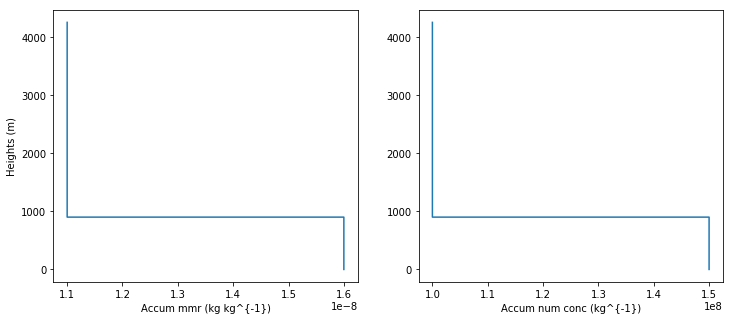

In [40]:
heights=[0.0, 900.0, 900.01, 4250]
accum_mmr=[1.6e-8, 1.6e-8, 1.1e-8, 1.1e-8]
accum_no=[150e6, 150e6, 100e6, 100e6]

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,5))
ax[0].plot(accum_mmr, heights)
ax[1].plot(accum_no, heights)
ax[0].set_ylabel('Heights (m)')
ax[0].set_xlabel('Accum mmr (kg kg^{-1})')
ax[1].set_xlabel('Accum num conc (kg^{-1})')
plt.show()

### Initial accumulation mode profiles 

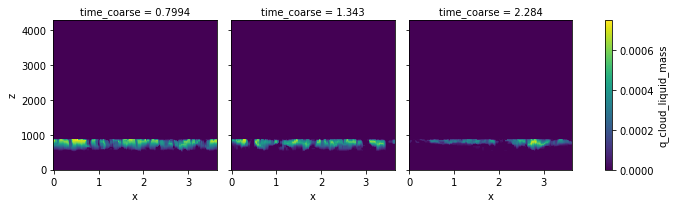

In [41]:
ds.q_cloud_liquid_mass[:,:,64,:].plot(col='time_coarse',y='z')

### Cloud liquid mass (kg kg^{-1})
- slice through domain along x axis
- time_coarse is in hours

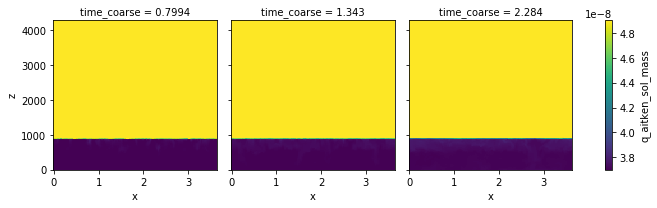

In [42]:
ds.q_aitken_sol_mass[:,:,64,:].plot(col='time_coarse',y='z')

### Aitken soluble mode mass-mixing ratio (kg kg^{-1})
- initial profile prescribed
- averaged x axis

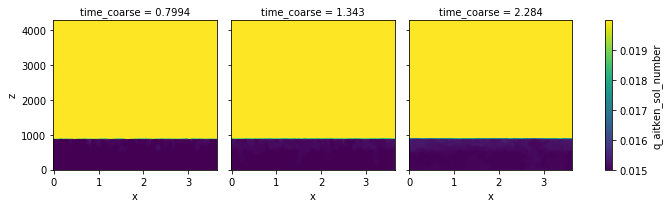

In [43]:
ds.q_aitken_sol_number[:,:,64,:].plot(col='time_coarse',y='z')

### Aitken soluble mode number concentration (kg^{-1})
- initial profile prescribed
- averaged x axis

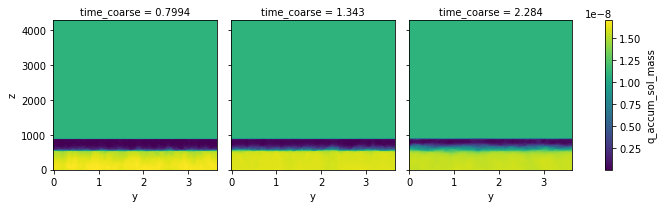

In [44]:
ds.q_accum_sol_mass[:,:,:,:].mean(axis=1).plot(col='time_coarse',y='z')

### Accumulation (soluble) mode mass mixing ratio (kg kg^{-1}) 
- initial profile prescribed
- averaged x axis

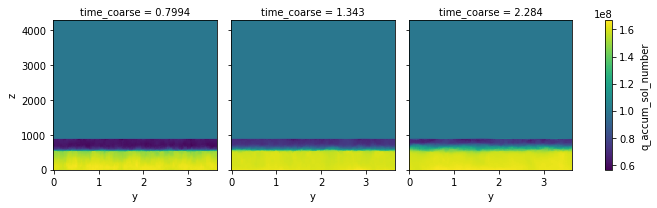

In [45]:
ds.q_accum_sol_number[:,:,:,:].mean(axis=1).plot(col='time_coarse',y='z')

### Accumulation mode number concentration (kg^{-1})
- initial profile prescribed
- averaged x axis

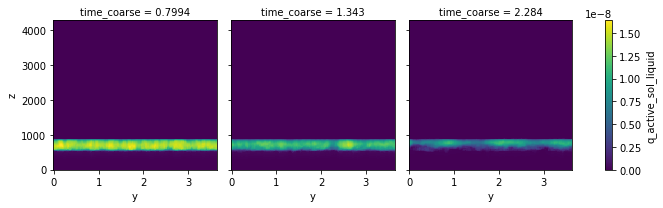

In [46]:
ds.q_active_sol_liquid[:,:,:,:].mean(axis=1).plot(col='time_coarse',y='z')

### Activated in-cloud soluble aerosol mass-mixing ratio (kg kg^{-1})
- averaged x axis
- evolved in simulation, no initial profile prescribed

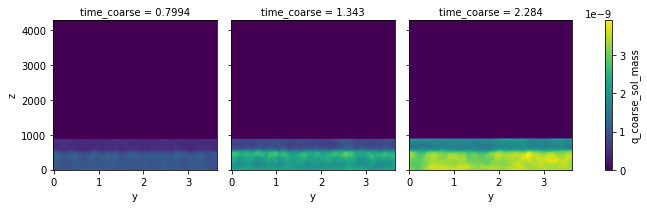

In [47]:
ds.q_coarse_sol_mass[:,:,:,:].mean(axis=1).plot(col='time_coarse',y='z')

### Coarse mode soluble mass-mixing ratio (kg kg^{-1})
- evolved in simulation, no initial profile prescribed

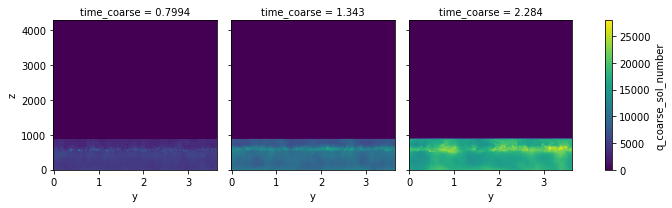

In [48]:
ds.q_coarse_sol_number[:,:,:,:].mean(axis=1).plot(col='time_coarse',y='z')

### Coarse mode soluble number concentration (kg^{-1})
- evolved in simulation, no initial profile prescribed